In [5]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import folium
import geopandas as gpd
import re

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnymariah/world-bank-data-etl")

print("Path to dataset files:", path)

100%|██████████| 7.76M/7.76M [00:00<00:00, 73.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1


In [7]:
# prompt: read the path and display

import os
print("Path to dataset files:", path)
!ls $path


Path to dataset files: /root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1
countrydata.csv  gdp.xls  population.xls  Projects.xls


In [8]:
# PROJECTS
df_projects = pd.read_excel('/root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1/Projects.xls',dtype='str',skiprows=2)
df_projects.head(2)

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21T00:00:00Z,...,15000000,Ministry of Finance,Investment Project Financing,B,Substantial,NaN,NaN,NaN,NaN,NaN
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21T00:00:00Z,...,130000,National Council for Internal Control - CONACI,Investment Project Financing,NaN,Low,NaN,NaN,NaN,NaN,NaN


In [9]:
len(df_projects)

21474

In [10]:
len(df_projects.columns)

26

In [11]:
df_projects.columns

Index(['id', 'regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2'],
      dtype='object')

In [12]:
#Inspecting a sample record
df_projects.iloc[1]

,1
id,P176877
regionname,Latin America and Caribbean
countryname,Federative Republic of Brazil
projectstatusdisplay,Active
project_name,Governance Risk Assessment System Brazil Scale-Up
pdo,Improve the process of detecting fraud in publ...
impagency,National Council for Internal Control - CONACI
cons_serv_reqd_ind,NaN
url,http://projects.worldbank.org/P176877/null?lan...
boardapprovaldate,2022-03-21T00:00:00Z


In [13]:
#Checking for null values
df_projects.isnull().sum()

,0
id,0
regionname,2
countryname,2
projectstatusdisplay,2
project_name,0
pdo,9966
impagency,14939
cons_serv_reqd_ind,20038
url,0
boardapprovaldate,2874


In [14]:
df_projects.shape

(21474, 26)

In [15]:
# POPULATION
df_population = pd.read_excel('/root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1/population.xls',dtype='str',skiprows=3)
df_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,...,102050,102565,103165,103776,104339,104865,105361,105846,106310,106766
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,532760424,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,360285439,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,24220660,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1791000,1807106,1818117,1812771,1788196,1777557,1791003,1797085,1788878,1775378
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351,5393034,5473671,5556767,5641598,5727745,...,23807586,24473176,25147112,25823488,26497881,27168210,27834811,28498683,29161922,29825968
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836,17524533,17965733,18423157,18896303,19384838,...,52003759,52832659,53687125,54544184,55386369,56207649,57009751,57792520,58558267,59308690
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780,3164330,3260645,3360099,3463211,3570466,...,14023199,14465148,14926551,15399793,15879370,16363449,16853608,17351714,17861034,18383956


In [16]:
len(df_population)

266

In [17]:
len(df_population.columns)

65

In [18]:
df_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [19]:
df_population.isnull().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,2
...,...
2016,2
2017,2
2018,2
2019,2


In [20]:
df_population.isnull().sum().max()

2

In [21]:
# All the year columns have upto 2 values missing. Inspecting further the rows that have null values.
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,Eritrea,ERI,"Population, total",SP.POP.TOTL,1007586,1033320,1060489,1088859,1118152,1148188,...,3213969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,269026,300581,337346,378756,423900,472032,...,3168054,3348852,3526382,3690939,3835588,3956862,4056102,4137314,4207077,4270563
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986,3979998,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269


Looks like 4 countries that are listed have missing values in them

In [22]:
df_gdp = pd.read_excel('/root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1/gdp.xls', skiprows=3)
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,...,1770.736230,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1862.308267,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3540.891789,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1374.621401,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,...,8810.930651,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1672.907535,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436


In [23]:
len(df_gdp)

266

In [24]:
len(df_gdp.columns)

65

In [25]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [26]:
df_gdp.isnull().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,138
...,...
2016,10
2017,10
2018,10
2019,13


In [27]:
# COUNTRY
df_countrydata = pd.read_csv('/root/.cache/kagglehub/datasets/johnymariah/world-bank-data-etl/versions/1/countrydata.csv')
df_countrydata

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,gdp_ff_bf,Country Name_y,Indicator Name_y,Indicator Code_y,datetime_y,population,population_filled,population_ffill,population_bfill,population_ff_bf
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P160865,Africa West,Federal Republic of Nigeria,Active,Livestock Productivity and Resilience Support ...,"To improve productivity, commercialization, an...",Federal Ministry of Agriculture and Rural Deve...,Y,http://projects.worldbank.org/P160865/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",NaN,http://projects.worldbank.org/P170113/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P172922,Africa East,United Republic of Tanzania,Active,Additional Financing to the Citizen-Centric Ju...,The project development objective is to improv...,Judiciary of Tanzania,NaN,http://projects.worldbank.org/P172922/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21469,P006578,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,NaN,NaN,NaN,http://projects.worldbank.org/P006578/null?lan...,1948-03-25 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21470,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,NaN,NaN,NaN,http://projects.worldbank.org/P037451/null?lan...,1947-08-28 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21471,P037362,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037362/null?lan...,1947-08-22 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21472,P037452,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037452/null?lan...,1947-08-07 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
len(df_countrydata)

21474

In [29]:
len(df_countrydata.columns)

53

In [30]:
df_countrydata.columns

Index(['id', 'regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Official Country Name', 'Country Code',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday', 'year', 'Year', 'Country Name_x',
       'Indicator Name_x', 'Indicator Code_x', 'datetime_x', 'gdp',
       'gdp_ffill', 'gdp_bfill', 'gdp_ff_bf', 'Country Name_y',
       'Indicator Name_y', 'Indicator Code_y', 'datetime_y', 'population',
       'population_filled', 'population_ffill', 'population_bfill',
       'population_ff_bf'],
      dtype='object')

In [ ]:
df_countrydata.isnull().sum()

,0
id,0
regionname,2
countryname,2
projectstatusdisplay,2
project_name,0
pdo,9966
impagency,14939
cons_serv_reqd_ind,20038
url,0
boardapprovaldate,2874


#Data Cleaning

In [ ]:
#Checking and dropping duplicate records if any
df_population[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


Adding 'Country Code' for joining Tables

In order to Join Projects , Population and GDP we need a common column. The Country Code can be used. However, the column is missing from the projects dataset.

Hence, Inspecting the Countryname column in projects dataset and adding an additional column to hold ISO 3 country codes

In [ ]:
df_projects['countryname'].unique()

array(['West Bank and Gaza', 'Federative Republic of Brazil',
       'Federal Republic of Nigeria', 'Republic of Kosovo',
       'United Republic of Tanzania', 'Republic of Haiti',
       'Eastern Africa', 'Hashemite Kingdom of Jordan', 'Solomon Islands',
       'Republic of Vanuatu', 'Republic of Senegal', 'Republic of Kenya',
       'World', 'Republic of South Sudan', 'Republic of Panama', 'Belize',
       'Socialist Republic of Vietnam', 'Republic of Tajikistan',
       'Islamic Republic of Pakistan', 'Kingdom of Cambodia',
       'Republic of Serbia', 'Republic of Cameroon', 'Republic of Congo',
       'Mongolia', 'Republic of Djibouti', 'Republic of Sierra Leone',
       'Ukraine', 'Africa', 'Kyrgyz Republic', 'Republic of Zimbabwe',
       'Republic of Armenia', 'Kingdom of Bhutan',
       "Lao People's Democratic Republic", 'Kingdom of Lesotho',
       'Central African Republic', 'Central Asia',
       "People's Republic of Bangladesh", 'Argentine Republic',
       'Lebanese Rep

In [ ]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

Using pycountry library to lookup ISO codes of the countries

In [ ]:
!pip install pycountry
from pycountry import countries
from collections import defaultdict
country_not_found = [] # to store countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) #empty dict

for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try:
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.4 MB/s eta 0:00:00
Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Latin America  not found
Macedonia, Republic of North  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found

The countries that were not found are regions and hence the corresponding ISO 3 codes were not retrived.

Checking the population dataset if these countries are present in them

In [ ]:
indicator_countries = df_population[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


Only 6 countries match both the list. Hence, manually Mapping ISO codes (since, its a smaller set of data)for the countries not found in the list.

In [ ]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

Creating 'Country Code' column in the projects dataset

In [ ]:
df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

In [ ]:
#Checking the records that do not have country code i.e these projects do not have matching projects in df_population
df_projects[df_projects['Country Code'] == '']
#3788 rows in total

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Official Country Name,Country Code
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21T00:00:00Z,...,Investment Project Financing,B,Substantial,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",NaN,http://projects.worldbank.org/P170113/null?lan...,2022-03-18T00:00:00Z,...,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Kosovo,
6,P177843,Africa East,Eastern Africa,Active,Additional Financing to Emergency Locust Respo...,To respond to the threat posed by the locust o...,"Uganda - Office of the Prime Minister, Uganda ...",TBD,http://projects.worldbank.org/P177843/null?lan...,2022-03-17T00:00:00Z,...,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,
13,P177600,Other,World,Active,Strengthening of CSOs and Youth Organizations ...,Enhancing the capacity of Civil Society and Yo...,PAI,Y,http://projects.worldbank.org/P177600/null?lan...,2022-03-16T00:00:00Z,...,Investment Project Financing,NaN,Low,NaN,NaN,NaN,NaN,NaN,World,
17,P176226,East Asia and Pacific,Socialist Republic of Vietnam,Active,Vietnam's Decarbonization and Energy Transition,To support decarbonization and energy transit...,Ministry of Industry and Trade,Y,http://projects.worldbank.org/P176226/null?lan...,2022-03-11T00:00:00Z,...,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN,Socialist Republic of Vietnam,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21445,P008109,Latin America and Caribbean,Oriental Republic of Uruguay,Closed,Power and Telephone Project,NaN,NaN,NaN,http://projects.worldbank.org/P008109/null?lan...,1950-08-25T00:00:00Z,...,Sector Investment and Maintenance Loan,NaN,NaN,(Historic)Thermal,NaN,NaN,NaN,NaN,Oriental Republic of Uruguay,
21446,P037342,East Asia and Pacific,Commonwealth of Australia,Closed,"Agriculture, Industry, Transport and Mining",NaN,NaN,NaN,http://projects.worldbank.org/P037342/null?lan...,1950-08-22T00:00:00Z,...,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN,Commonwealth of Australia,
21447,P008872,Europe and Central Asia,Republic of Turkey,Closed,Grain Storage Project,NaN,NaN,NaN,http://projects.worldbank.org/P008872/null?lan...,1950-07-07T00:00:00Z,...,Specific Investment Loan,NaN,NaN,(Historic)Agro-industry and marketing,NaN,NaN,NaN,NaN,Republic of Turkey,
21448,P008874,Europe and Central Asia,Republic of Turkey,Closed,Port Project,NaN,NaN,NaN,http://projects.worldbank.org/P008874/null?lan...,1950-07-07T00:00:00Z,...,Specific Investment Loan,NaN,NaN,Ports/Waterways,NaN,NaN,NaN,NaN,Republic of Turkey,


In [ ]:
# Inspecting the Data Type for the dataset's
df_population.dtypes

,0
Country Name,object
Country Code,object
Indicator Name,object
Indicator Code,object
1960,object
...,...
2016,object
2017,object
2018,object
2019,object


Converting population data to float

In [ ]:
for i in range(1960, 2021, 1):
    k = str(i)
    df_population[k] = pd.to_numeric(df_population[k])

In [ ]:
df_projects.dtypes

,0
id,object
regionname,object
countryname,object
projectstatusdisplay,object
project_name,object
pdo,object
impagency,object
cons_serv_reqd_ind,object
url,object
boardapprovaldate,object


Converting few columns to numeric values and datetime

In [ ]:
df_projects['curr_project_cost'] = pd.to_numeric(df_projects['curr_project_cost'].str.replace(',',""))
df_projects['grantamt'] = pd.to_numeric(df_projects['grantamt'])

In [ ]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

Creating seperate column for date attribute categories

In [ ]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

Imputing Missing Values

In [ ]:
df_population.isnull().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,2
...,...
2016,2
2017,2
2018,2
2019,2


In [ ]:
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,Eritrea,ERI,"Population, total",SP.POP.TOTL,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,...,3213969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,...,3168054.0,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt_p = pd.melt(df_population, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='population')

df_melt_p.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,year,population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54208.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130836765.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996967.0


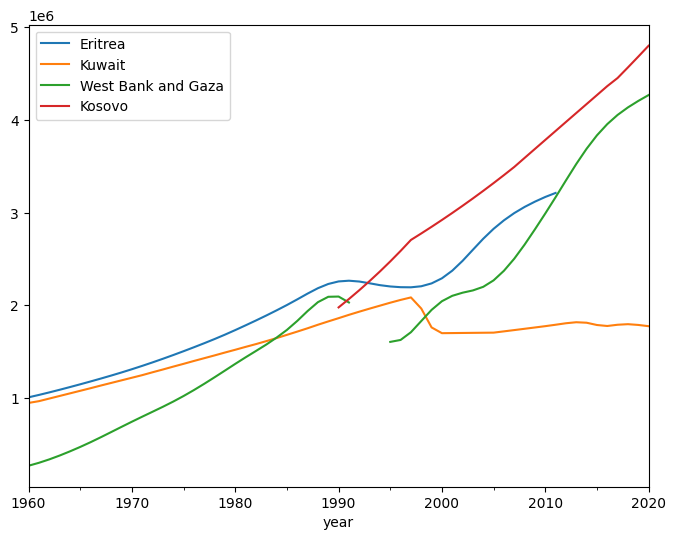

In [ ]:
# convert year to a date time
df_melt_p['year'] = pd.to_datetime(df_melt_p['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt_p[(df_melt_p['Country Name'] == 'Eritrea') |
            (df_melt_p['Country Name'] == 'Kuwait') |
            (df_melt_p['Country Name'] == 'West Bank and Gaza') |
            (df_melt_p['Country Name'] == 'Kosovo')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Eritrea', 'Kuwait', 'West Bank and Gaza','Kosovo'])

plot_results('population')

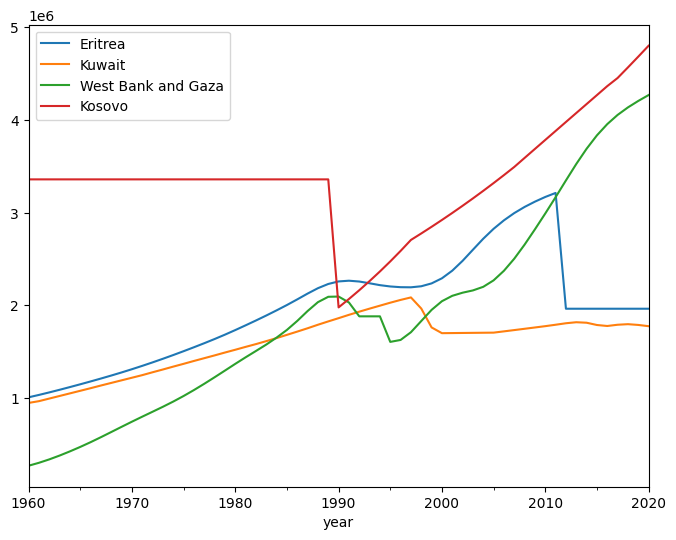

In [ ]:
df_melt_p['population_filled'] = df_melt_p.groupby('Country Name')['population'].transform(lambda x: x.fillna(x.mean()))
plot_results('population_filled')

Using the mean values to fill the missing values is not a good idea as the population usually increases over time. (case Kosovo)

Using forward fill and backward fill instead

<ipython-input-44-9c845e33e0ab>:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt_p['population_ffill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill')
<ipython-input-44-9c845e33e0ab>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt_p['population_ffill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill')


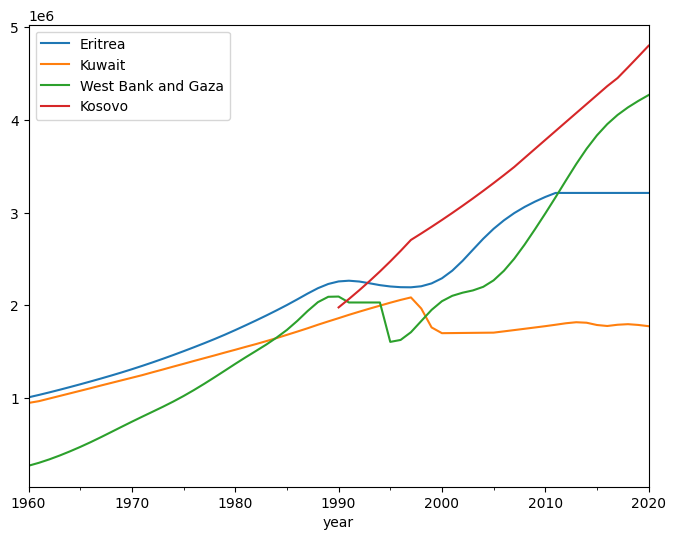

In [ ]:
df_melt_p['population_ffill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill')
plot_results('population_ffill')

<ipython-input-45-6e1759fbe164>:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt_p['population_bfill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='bfill')
<ipython-input-45-6e1759fbe164>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt_p['population_bfill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='bfill')


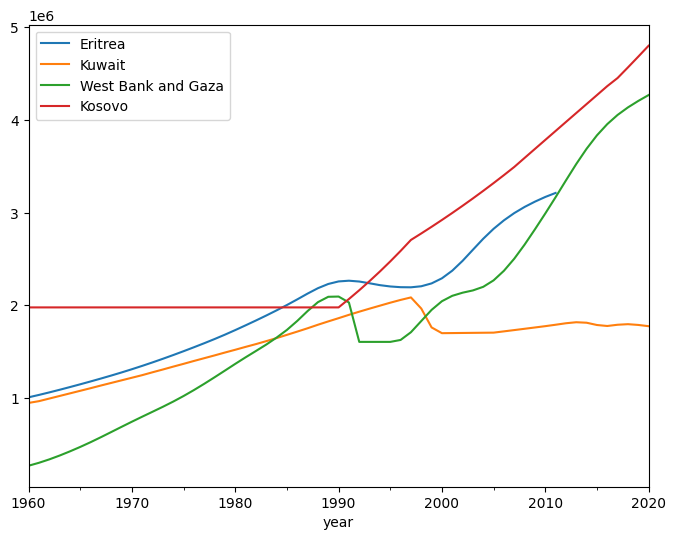

In [ ]:
df_melt_p['population_bfill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='bfill')
plot_results('population_bfill')

In [ ]:
# Running forward fill and backward fill on the population data
df_melt_p['population_ff_bf'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt_p['population_ff_bf'].isnull().sum()

<ipython-input-46-56b85bf88ee7>:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt_p['population_ff_bf'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-46-56b85bf88ee7>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt_p['population_ff_bf'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')


0

Imputing the missing values for GDP as well

<ipython-input-47-7a2123d42f21>:22: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt_g['gdp_ffill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill')
<ipython-input-47-7a2123d42f21>:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt_g['gdp_ffill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill')
<ipython-input-47-7a2123d42f21>:25: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt_g['gdp_bfill'] = df_melt_g.sort_values('year').groupby('Country Nam

0

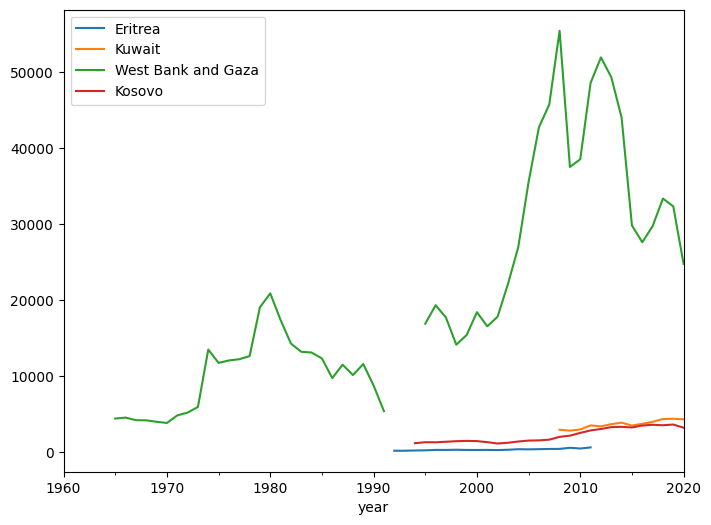

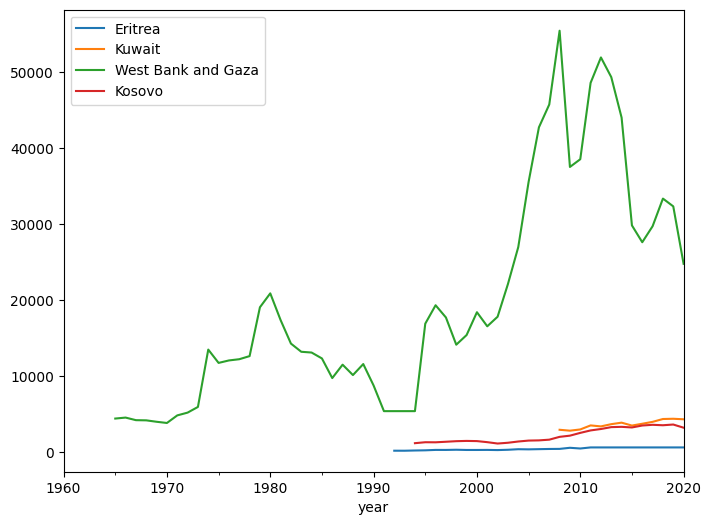

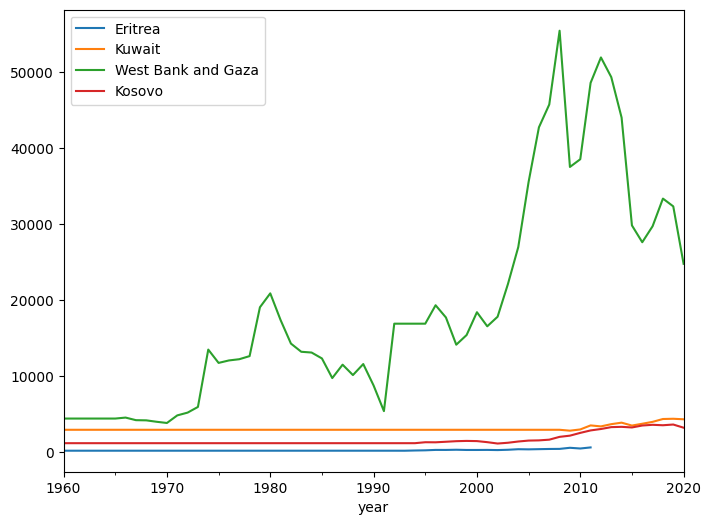

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt_g = pd.melt(df_gdp, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='gdp')

df_melt_g.head(3)

df_melt_g['year'] = pd.to_datetime(df_melt_g['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt_g[(df_melt_g['Country Name'] == 'Eritrea') |
            (df_melt_g['Country Name'] == 'Kuwait') |
            (df_melt_g['Country Name'] == 'West Bank and Gaza') |
            (df_melt_g['Country Name'] == 'Kosovo')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Eritrea', 'Kuwait', 'West Bank and Gaza','Kosovo'])

plot_results('gdp')
df_melt_g['gdp_ffill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill')
plot_results('gdp_ffill')

df_melt_g['gdp_bfill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='bfill')
plot_results('gdp_bfill')

# Run forward fill and backward fill on the gdp data
df_melt_g['gdp_ff_bf'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')


# Check if any GDP values are null
df_melt_g['gdp_ff_bf'].isnull().sum()

Creating Dummy Variables

In [ ]:
df_projects.columns

Index(['id', 'regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Official Country Name', 'Country Code',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday'],
      dtype='object')

In [ ]:
# keep the project name, lending, sector and theme data
sector = df_projects.copy()
sector = sector[['regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Country Code', 'Official Country Name',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday']]

In [ ]:
# output percentage of values that are missing
100 * sector.isnull().sum() / sector.shape[0]

,0
regionname,0.009314
countryname,0.009314
projectstatusdisplay,0.009314
project_name,0.000000
pdo,46.409612
impagency,69.567849
cons_serv_reqd_ind,93.312843
url,0.000000
boardapprovaldate,13.383627
closingdate,23.386421


In [ ]:
uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['(Historic)Agency reform', '(Historic)Agricultural credit',
       '(Historic)Agricultural extension',
       '(Historic)Agriculture adjustment', '(Historic)Agro-industry',
       '(Historic)Agro-industry and marketing', '(Historic)Annual crops',
       '(Historic)Basic health', '(Historic)Business environment',
       '(Historic)Civil service reform', '(Historic)Decentralization',
       '(Historic)Distribution and transmission',
       '(Historic)Economic management', '(Historic)Education adjustment',
       '(Historic)Electric power and other energy adjustment',
       '(Historic)Environment adjustment',
       '(Historic)Environmental institutions',
       '(Historic)Fertilizer and other chemicals',
       '(Historic)Financial adjustment',
       '(Historic)Financial sector development', '(Historic)HIV/AIDS',
       '(Historic)Highways', '(Historic)Hydro',
       '(Historic)Industrial adjustment',
       '(Historic)Industrial restructuring',
       '(Historic)Institutional D

In [ ]:
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 160


In [ ]:
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

In [ ]:
print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 157
Percentage of null values after cleaning: 9.322902114184595


In [ ]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

#  Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
df_projects['year'] = df_projects['boardapprovaldate'].dt.year
df = df_projects[['curr_project_cost','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

,curr_project_cost,year,"Adult, Basic and Continuing Education",Agency reform,"Agricultural Extension, Research, and Other Support Activities",Agricultural credit,Agricultural extension,"Agricultural markets, commercialization and agri-business",Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,23500000.0,2022.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,130000.0,2022.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,500000000.0,2022.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,56400000.0,2022.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,90000000.0,2022.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_final.columns

Index(['curr_project_cost', 'year', 'Adult, Basic and Continuing Education',
       'Agency reform',
       'Agricultural Extension, Research, and Other Support Activities',
       'Agricultural credit', 'Agricultural extension',
       'Agricultural markets, commercialization and agri-business',
       'Agriculture adjustment', 'Agro-industry',
       ...
       'Urban environment', 'Urban housing', 'Urban management',
       'Urban transport', 'Urban water supply', 'Vocational training',
       'Waste Management', 'Water Supply',
       'Water supply and sanitation adjustment',
       'Workforce Development and Vocational Education'],
      dtype='object', length=158)

Finding Outliers

In [ ]:
# read in the projects data set and do basic wrangling
gdp = df_gdp.copy()
gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = df_population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))
df_country['gdp'] = pd.to_numeric(df_country['gdp'])
#df_country['year'] = pd.to_numeric(df_country['year'])
df_country['population'] = pd.to_numeric(df_country['population'])
# filter data for the year 2016
df_2020 = df_country[df_country['year'] == '2020']

# see what the data looks like
df_2020

<ipython-input-58-adf5cf6a9a33>:11: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-58-adf5cf6a9a33>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-58-adf5cf6a9a33>:18: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt['population'] = population_me

,Country Name,year,gdp,population
15960,Aruba,2020,30253.279358,106766.0
15961,Africa Eastern and Southern,2020,1359.618224,677243299.0
15962,Afghanistan,2020,516.747871,38928341.0
15963,Africa Western and Central,2020,1710.073363,458803476.0
15964,Angola,2020,1776.166868,32866268.0
...,...,...,...,...
16221,Kosovo,2020,4346.637931,1775378.0
16222,"Yemen, Rep.",2020,758.145242,29825968.0
16223,South Africa,2020,5655.867654,59308690.0
16224,Zambia,2020,985.132436,18383956.0


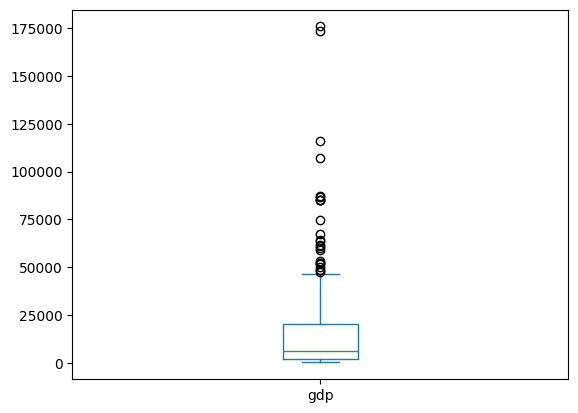

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Make a boxplot of the population data for the year 2020
df_2020.plot('population',kind='box');

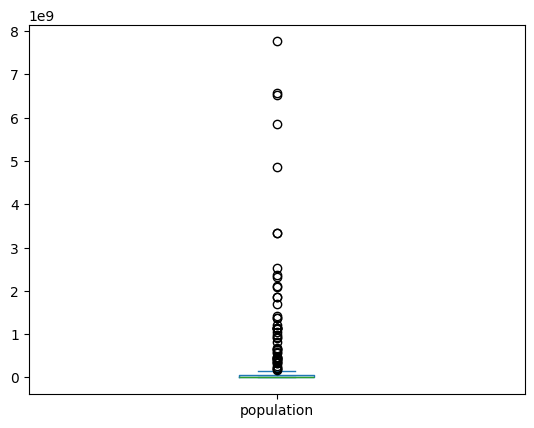

In [ ]:
# Make a boxplot of the gdp data for the year 2020
df_2020.plot('gdp',kind='box');

2-D perspective of the outliers

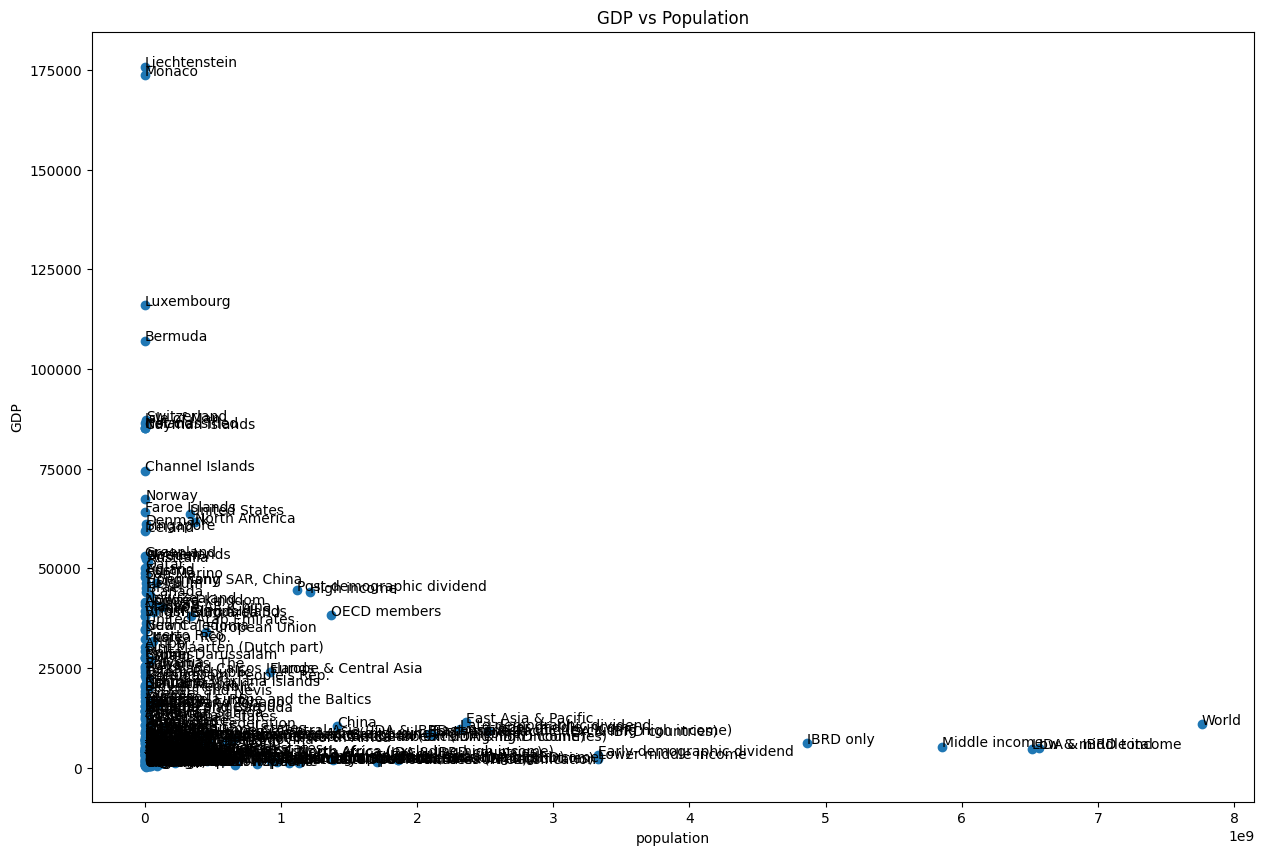

In [ ]:
x = list(df_2020['population'])
y = list(df_2020['gdp'])
text = df_2020['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

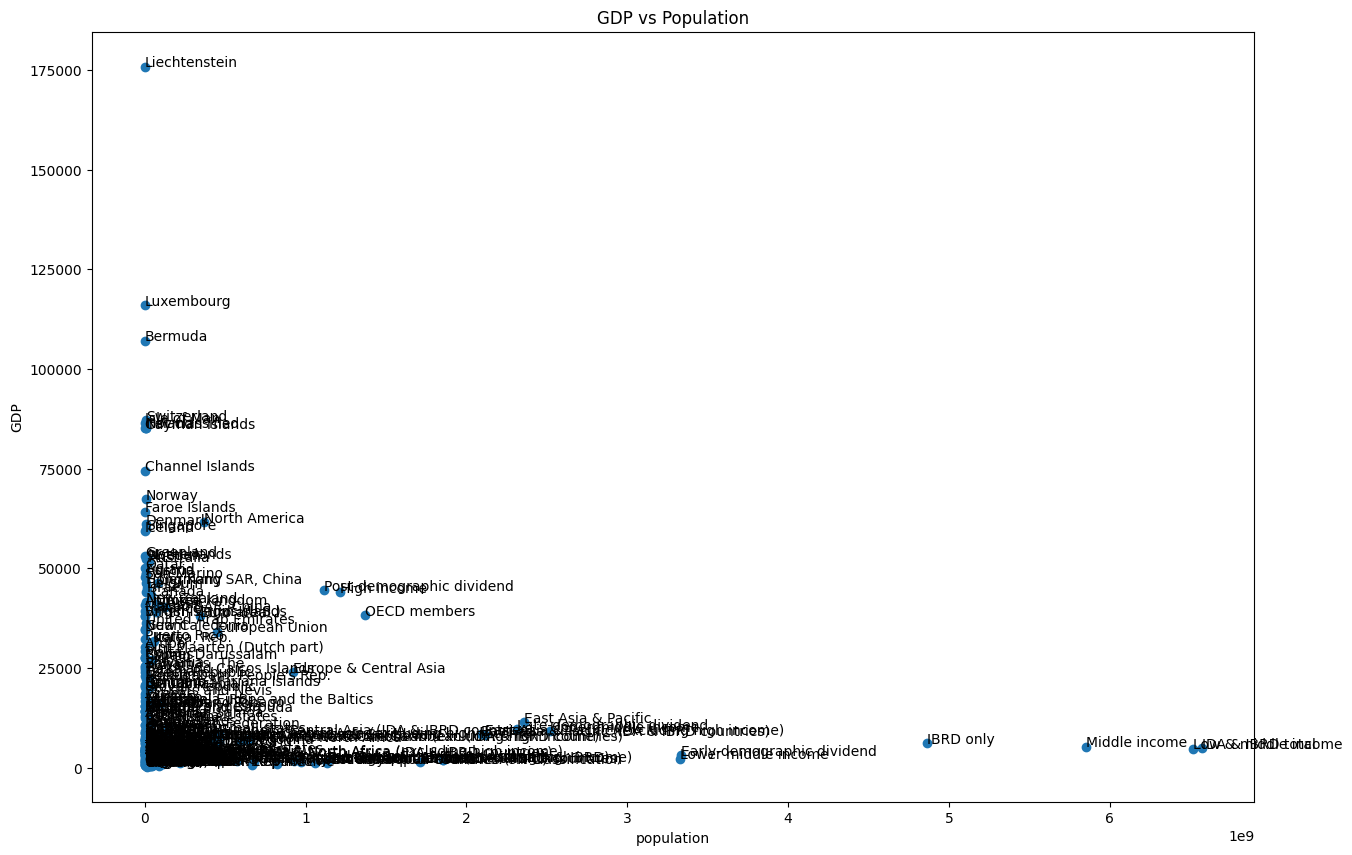

In [ ]:
df_no_large = (df_2020['Country Name'] != 'United States') & (df_2020['Country Name'] != 'World')  & (df_2020['Country Name'] != 'India') & (df_2020['Country Name'] != 'Monaco') & (df_2020['Country Name'] != 'China')
x = list(df_2020[df_no_large]['population'])
y = list(df_2020[df_no_large]['gdp'])
text = df_2020[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Use the Tukey rule to determine what values of the population data are outliers for the year 2020. The Tukey rule finds outliers in one-dimension. The steps are:

Find the first quartile (ie .25 quantile) Find the third quartile (ie .75 quantile) Calculate the inter-quartile range (Q3 - Q1) Any value that is greater than Q3 + 1.5 IQR is an outlier Any value that is less than Qe - 1.5 IQR is an outlier

In [ ]:
population_2020 = df_2020[['Country Name','population']]

# Calculate the first quartile of the population values for 2020
Q1 = population_2020['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2020
Q3 = population_2020['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2020 data for population values that are greater than max_value or less than min_value
population_outliers = population_2020[(population_2020['population'] > max_value) | (population_2020['population'] < min_value)]
population_outliers

,Country Name,population
15961,Africa Eastern and Southern,6.772433e+08
15963,Africa Western and Central,4.588035e+08
15967,Arab World,4.360807e+08
15980,Bangladesh,1.646894e+08
15989,Brazil,2.125594e+08
16000,China,1.410929e+09
16021,East Asia & Pacific (excluding high income),2.113821e+09
16022,Early-demographic dividend,3.332105e+09
16023,East Asia & Pacific,2.360855e+09
16024,Europe & Central Asia (excluding high income),4.202117e+08


Most of the countries listed here are regions rather than countries

In [ ]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2020 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

In [ ]:
# remove non countries from the data
df_2020 = df_2020[~df_2020['Country Name'].isin(non_countries)]

Re-reruning the Tukey code with this filtered data to find population outliers

In [ ]:
# Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2020 = df_2020[['Country Name','population']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = population_2020['population'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = population_2020['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2020[(population_2020['population'] > max_value) | (population_2020['population'] < min_value)]
population_outliers

,Country Name,population
15961,Africa Eastern and Southern,6.772433e+08
15963,Africa Western and Central,4.588035e+08
15980,Bangladesh,1.646894e+08
15989,Brazil,2.125594e+08
16000,China,1.410929e+09
16003,"Congo, Dem. Rep.",8.956140e+07
16015,Germany,8.324052e+07
16027,"Egypt, Arab Rep.",1.023344e+08
16032,Ethiopia,1.149636e+08
16037,France,6.739158e+07


Running the Tukey code with this filtered data to find gdp outliers

In [ ]:
# to keep the Country Name and population columns
gdp_2020 = df_2020[['Country Name','gdp']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = gdp_2020['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2020['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2020[(gdp_2020['gdp'] > max_value) | (gdp_2020['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
15987,Bermuda,107079.479837
15997,Switzerland,87097.036450
15998,Channel Islands,74458.794666
16012,Cayman Islands,85082.526856
16018,Denmark,61063.316430
16038,Faroe Islands,64225.264905
16051,Greenland,53041.303310
16068,Isle of Man,86481.552591
16071,Ireland,85267.764744
16074,Iceland,59270.180051


In [ ]:
# Finding country names that are in both the population_outliers and the gdp_outliers
list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['United States']

In [ ]:
# Finding country names that are in the population outliers list but not the gdp outliers list
list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['United Kingdom',
 'Brazil',
 'Philippines',
 'France',
 'Russian Federation',
 'China',
 'Nigeria',
 'Africa Western and Central',
 'Indonesia',
 'India',
 'Thailand',
 'Egypt, Arab Rep.',
 'Germany',
 'Ethiopia',
 'Turkey',
 'Africa Eastern and Southern',
 'Vietnam',
 'Congo, Dem. Rep.',
 'Bangladesh',
 'Pakistan',
 'Japan',
 'Mexico',
 'Iran, Islamic Rep.']

In [ ]:
# Finding country names that are in the gdp outliers list but not the population outliers list
list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Sweden',
 'Iceland',
 'Bermuda',
 'Channel Islands',
 'Ireland',
 'Luxembourg',
 'Switzerland',
 'Liechtenstein',
 'Monaco',
 'Faroe Islands',
 'Greenland',
 'Norway',
 'Denmark',
 'Cayman Islands',
 'Singapore',
 'Netherlands',
 'Isle of Man']